# Medical Appointment No Shows

##### Why do 30% of patients miss their scheduled appointments?

110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment

<b>outline</b> <br>

1.[Data connection](#step1) <br>
2.[Data wrangling](#step2) <br>
i.[assessment](#step3) <br>
ii.[Quality](#step4) <br>
3.[Data visualizing](#step5) <br>
4.[Results and Reporting](#step6) <br>

In [3]:
from sklearn import linear_model
import pandas as pd
from sklearn.dummy import DummyRegressor
from datetime import datetime

# Step 1 : 
### Step 1 : Data Connection and exploration <a id="step1"></a>

In [32]:
# read the data file
data=pd.read_csv("archive.zip")

In [33]:
# create a data copy

df=data.copy()

In [34]:
# explore the data 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [36]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Step 2 : 
### Step 2 : understanding the data set <a id="step2"></a>

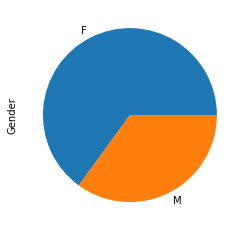

In [6]:
# understand the data

df.Gender.value_counts().plot(kind='pie')

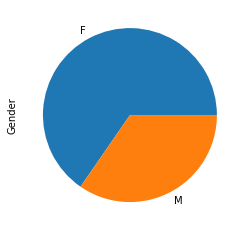

In [7]:
df.Gender[df['No-show']!='No'].value_counts().plot(kind='pie')

In [8]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

# Step 3 : 
### Step 3 : Data wrangling <a id="step3"></a>

In [13]:
df.replace('No',0,inplace=True)
df.replace('Yes',1,inplace=True)

In [12]:
# drop unnecessary fields

df[['PatientId', 'AppointmentID','Neighbourhood']]

,PatientId,AppointmentID,Neighbourhood
0,2.987250e+13,5642903,JARDIM DA PENHA
1,5.589978e+14,5642503,JARDIM DA PENHA
2,4.262962e+12,5642549,MATA DA PRAIA
3,8.679512e+11,5642828,PONTAL DE CAMBURI
4,8.841186e+12,5642494,JARDIM DA PENHA
...,...,...,...
110522,2.572134e+12,5651768,MARIA ORTIZ
110523,3.596266e+12,5650093,MARIA ORTIZ
110524,1.557663e+13,5630692,MARIA ORTIZ
110525,9.213493e+13,5630323,MARIA ORTIZ


In [14]:
## because of SMS received ?
df[['No-show','SMS_received','Diabetes','Scholarship','Hipertension','Handcap','Alcoholism','Age']].corr()

,No-show,SMS_received,Diabetes,Scholarship,Hipertension,Handcap,Alcoholism,Age
No-show,1.000000,0.126431,-0.015180,0.029135,-0.035701,-0.006076,-0.000196,-0.060319
SMS_received,0.126431,1.000000,-0.014550,0.001194,-0.006267,-0.024161,-0.026147,0.012643
Diabetes,-0.015180,-0.014550,1.000000,-0.024894,0.433086,0.057530,0.018474,0.292391
Scholarship,0.029135,0.001194,-0.024894,1.000000,-0.019729,-0.008586,0.035022,-0.092457
Hipertension,-0.035701,-0.006267,0.433086,-0.019729,1.000000,0.080083,0.087971,0.504586
Handcap,-0.006076,-0.024161,0.057530,-0.008586,0.080083,1.000000,0.004648,0.078033
Alcoholism,-0.000196,-0.026147,0.018474,0.035022,0.087971,0.004648,1.000000,0.095811
Age,-0.060319,0.012643,0.292391,-0.092457,0.504586,0.078033,0.095811,1.000000


In [16]:
## because the time difference between appointment booking date and show date? 


##1 chane column type to date


df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'],format='%Y-%m-%dT%H:%M:%SZ')
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'],format='%Y-%m-%dT%H:%M:%SZ')

In [17]:
# check the updated data type
df[['AppointmentDay','ScheduledDay']].dtypes

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object

In [27]:
# substract both dates
df['waiting_time']=df['AppointmentDay'].dt.day-df['ScheduledDay'].dt.day
df['waiting_time']

0          0
1          0
2          0
3          0
4          0
          ..
110522     4
110523     4
110524   -20
110525   -20
110526   -20
Name: waiting_time, Length: 110527, dtype: int64

In [26]:
## check whether longer waiting time correlate with no show

df[['waiting_time','No-show']].corr()

,waiting_time,No-show
waiting_time,1.000000,-0.038823
No-show,-0.038823,1.000000


# Step 4 : 
### Step 4 : Data Model <a id="step4"></a>

In [10]:
## run regression model to check which factor

reg = linear_model.LinearRegression()

In [29]:
# split the dataframe into x and y 

y=df['No-show']
x=df.pop("No-show")

In [49]:
y.value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [50]:
# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [51]:
# Split the targets into training/testing sets
x_train = x[:-20]
x_test = x[-20:]

In [52]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [47]:
# Train the model using the training sets
regr.fit(x_train, y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
regr.fit(x_train, y_train)
   # predicted = regr.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x, y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [57]:
dummy_regr.predict(x)

array([0.20193256, 0.20193256, 0.20193256, ..., 0.20193256, 0.20193256,
       0.20193256])

In [58]:
dummy_regr.score(x, y)

0.0

In [60]:
dummy_regr

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [ ]:
## current issue with dummay variable, its currently under research, I have to deliver the first draft for now because of the deadline. 